In [1]:
import re
import math
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
summary = pd.read_csv("atusdata/atussum_2013.dat")

In [5]:
def average_minutes(data, activity_col):
    data = data.rename(columns={"TUFINLWGT": "weight", activity_col: "minutes"})
    data = data[['weight', "minutes"]]
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

In [6]:
def stdev_minutes(data, activity_col):
    data_mean = average_minutes(data, activity_col)
    num_non0_obs = summary[summary.TUFINLWGT != 0].TUFINLWGT.count()
    data = data.rename(columns={"TUFINLWGT": "weight", activity_col: "minutes"})
    data = data[["weight", "minutes"]]
    data['weighted_ss'] = data.weight * (data.minutes - data_mean)**2
    return math.sqrt(data.weighted_ss.sum()/(((num_non0_obs-1)/num_non0_obs)*data.weight.sum()))

In [7]:
def activity_columns(data, activity_code):
    """For the activity code given, return all columns that fall under that activity."""
    col_prefix = "t{}".format(activity_code)
    return [column for column in data.columns if re.match(col_prefix, column)]

In [8]:
def hypothesis_test_plot(data, group_var, test_var):
    data = data[[group_var, test_var, "TUFINLWGT"]]
    data_grouped = data.groupby(group_var)
    frame = pd.DataFrame()
    for group in data_grouped:
        count = group[1].TUFINLWGT.count()
        mean = average_minutes(group[1], test_var)
        stdev = stdev_minutes(group[1], test_var)
        frame = frame.append({group_var: group[0], "mean": mean, "error": (stdev*1.96/math.sqrt(count))}, ignore_index=True)
    frame.index = frame.pop(group_var)
    plot = frame.plot(kind="bar", yerr="error", figsize=(12, 8))
    return (frame, plot)
    

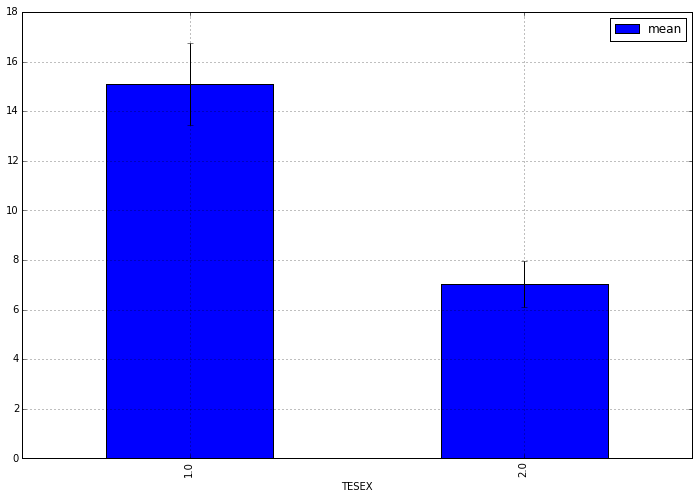

In [9]:
hypothesis_test_plot(summary, "TESEX", "t020501")[1]

In [10]:
import re
with open("Bekk'sRoom/dictionary.py") as dictionary:
    string = dictionary.read()
string = re.sub(r'[\n \{\}]', "", string[5:-3])
string = re.sub(r"','", "\n", string)
string = re.sub(r"':'", ",", string)
with open("Bekk'sRoom/dictionary.csv", 'w') as dictionary:
    dictionary.write(string)

FileNotFoundError: [Errno 2] No such file or directory: "Bekk'sRoom/dictionary.py"

In [11]:
from BekksRoom.messy import datasets
from BekksRoom.dictionary import key
test = summary.rename(columns=key)

In [13]:
newdata = datasets(test)

want the average? y/n n
Want your data cleaned?  We drop zeros and nan. y/n y
Want standard Deviation? y/n n
Want hypothesis testing? y/n n
household
weight
Age_of_youngest_child
Age
Gender
Notsure
PTDTRACE
PEHSPNON
GTMETSTA
labor_force_status
last_7_Days__more_then_one_job
full time or part time
student_status
allocation_flag
spouse_parter_in_house
employment_status_of_SO
weekly_earning_main_job
num_house_child
full/part_employ_SO
total_hours_worked_per_week
day_of_interview
flag_if_interviewday_was_holiday
totaltimespent_providing_eldercare
totaltimespend_childcare
sleeping
sleeplessness
washing,dressingandgroomingoneself
GroomingNEC
Health-relatedselfcare
selfcareNEC
Personal/Private_activities
InteriorCleaning
Laundry
Sewing,repairing&maintaintextiles
Storing/interioritems,food
housework
food/drinkprep
foodpresentation
kitchen/foodcleanup
food/drinkprep/present/clean
interiorarrange,decorate,repair
building/repair,furniture
healing/cooking
interiormaintenance,repairdecorate
exterio

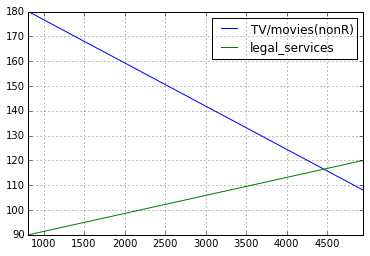

In [15]:
newdata.plot()

In [19]:
tvlegal = datasets(test)

want the average? y/n n
Want your data cleaned?  We drop zeros and nan. y/n n
Want standard Deviation? y/n n
Want hypothesis testing? y/n n
household
weight
Age_of_youngest_child
Age
Gender
Notsure
PTDTRACE
PEHSPNON
GTMETSTA
labor_force_status
last_7_Days__more_then_one_job
full time or part time
student_status
allocation_flag
spouse_parter_in_house
employment_status_of_SO
weekly_earning_main_job
num_house_child
full/part_employ_SO
total_hours_worked_per_week
day_of_interview
flag_if_interviewday_was_holiday
totaltimespent_providing_eldercare
totaltimespend_childcare
sleeping
sleeplessness
washing,dressingandgroomingoneself
GroomingNEC
Health-relatedselfcare
selfcareNEC
Personal/Private_activities
InteriorCleaning
Laundry
Sewing,repairing&maintaintextiles
Storing/interioritems,food
housework
food/drinkprep
foodpresentation
kitchen/foodcleanup
food/drinkprep/present/clean
interiorarrange,decorate,repair
building/repair,furniture
healing/cooking
interiormaintenance,repairdecorate
exterio

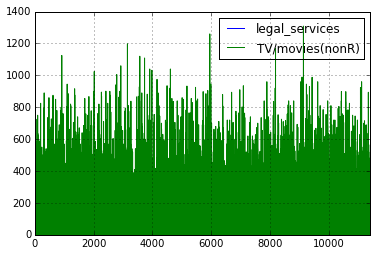

In [21]:
tvlegal.plot()

In [22]:
thinkingtravelrelatedvolunteering = datasets(test)


want the average? y/n n
Want your data cleaned?  We drop zeros and nan. y/n y
Want standard Deviation? y/n n
Want hypothesis testing? y/n n
household
weight
Age_of_youngest_child
Age
Gender
Notsure
PTDTRACE
PEHSPNON
GTMETSTA
labor_force_status
last_7_Days__more_then_one_job
full time or part time
student_status
allocation_flag
spouse_parter_in_house
employment_status_of_SO
weekly_earning_main_job
num_house_child
full/part_employ_SO
total_hours_worked_per_week
day_of_interview
flag_if_interviewday_was_holiday
totaltimespent_providing_eldercare
totaltimespend_childcare
sleeping
sleeplessness
washing,dressingandgroomingoneself
GroomingNEC
Health-relatedselfcare
selfcareNEC
Personal/Private_activities
InteriorCleaning
Laundry
Sewing,repairing&maintaintextiles
Storing/interioritems,food
housework
food/drinkprep
foodpresentation
kitchen/foodcleanup
food/drinkprep/present/clean
interiorarrange,decorate,repair
building/repair,furniture
healing/cooking
interiormaintenance,repairdecorate
exterio

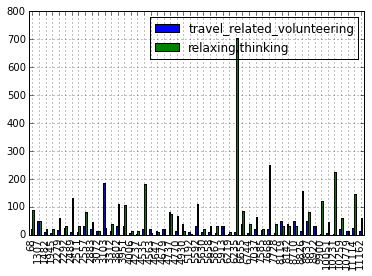

In [26]:
thinkingtravelrelatedvolunteering.plot(kind = "bar")

In [27]:
tlmccomputeruse = datasets(test)

want the average? y/n y
Want your data cleaned?  We drop zeros and nan. y/n y
Automatically including weight because you want the average
Want hypothesis testing? y/n n
household
weight
Age_of_youngest_child
Age
Gender
Notsure
PTDTRACE
PEHSPNON
GTMETSTA
labor_force_status
last_7_Days__more_then_one_job
full time or part time
student_status
allocation_flag
spouse_parter_in_house
employment_status_of_SO
weekly_earning_main_job
num_house_child
full/part_employ_SO
total_hours_worked_per_week
day_of_interview
flag_if_interviewday_was_holiday
totaltimespent_providing_eldercare
totaltimespend_childcare
sleeping
sleeplessness
washing,dressingandgroomingoneself
GroomingNEC
Health-relatedselfcare
selfcareNEC
Personal/Private_activities
InteriorCleaning
Laundry
Sewing,repairing&maintaintextiles
Storing/interioritems,food
housework
food/drinkprep
foodpresentation
kitchen/foodcleanup
food/drinkprep/present/clean
interiorarrange,decorate,repair
building/repair,furniture
healing/cooking
interiormaint

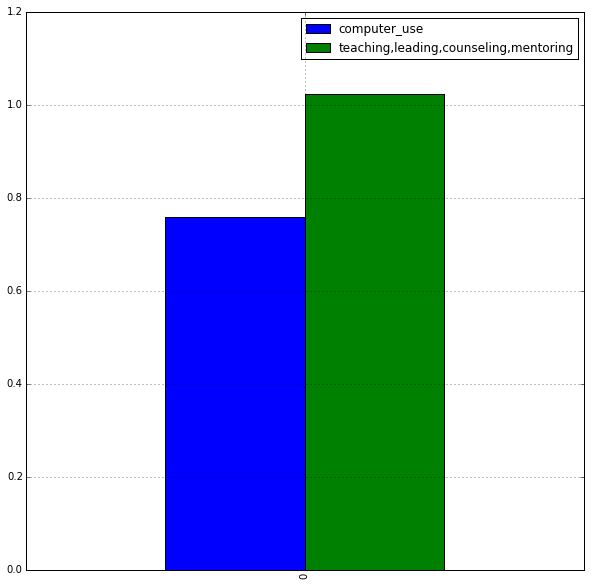

In [32]:
tlmccomputeruse.plot(kind="bar", figsize =(10,10))

In [33]:
kids = test.Age < 18
youth = datasets(test, kids)

want the average? y/n y
Want your data cleaned?  We drop zeros and nan. y/n y
Automatically including weight because you want the average
Want hypothesis testing? y/n n
household
weight
Age_of_youngest_child
Age
Gender
Notsure
PTDTRACE
PEHSPNON
GTMETSTA
labor_force_status
last_7_Days__more_then_one_job
full time or part time
student_status
allocation_flag
spouse_parter_in_house
employment_status_of_SO
weekly_earning_main_job
num_house_child
full/part_employ_SO
total_hours_worked_per_week
day_of_interview
flag_if_interviewday_was_holiday
totaltimespent_providing_eldercare
totaltimespend_childcare
sleeping
sleeplessness
washing,dressingandgroomingoneself
GroomingNEC
Health-relatedselfcare
selfcareNEC
Personal/Private_activities
InteriorCleaning
Laundry
Sewing,repairing&maintaintextiles
Storing/interioritems,food
housework
food/drinkprep
foodpresentation
kitchen/foodcleanup
food/drinkprep/present/clean
interiorarrange,decorate,repair
building/repair,furniture
healing/cooking
interiormaint

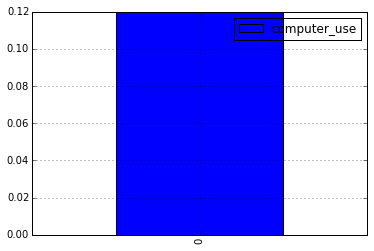

In [34]:
youth.plot(kind='bar')

In [35]:
adult = test.Age > 18
adults = datasets(test, adult)

want the average? y/n y
Want your data cleaned?  We drop zeros and nan. y/n y
Automatically including weight because you want the average
Want hypothesis testing? y/n n
household
weight
Age_of_youngest_child
Age
Gender
Notsure
PTDTRACE
PEHSPNON
GTMETSTA
labor_force_status
last_7_Days__more_then_one_job
full time or part time
student_status
allocation_flag
spouse_parter_in_house
employment_status_of_SO
weekly_earning_main_job
num_house_child
full/part_employ_SO
total_hours_worked_per_week
day_of_interview
flag_if_interviewday_was_holiday
totaltimespent_providing_eldercare
totaltimespend_childcare
sleeping
sleeplessness
washing,dressingandgroomingoneself
GroomingNEC
Health-relatedselfcare
selfcareNEC
Personal/Private_activities
InteriorCleaning
Laundry
Sewing,repairing&maintaintextiles
Storing/interioritems,food
housework
food/drinkprep
foodpresentation
kitchen/foodcleanup
food/drinkprep/present/clean
interiorarrange,decorate,repair
building/repair,furniture
healing/cooking
interiormaint

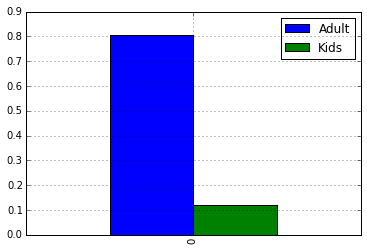

In [59]:
compare = pd.DataFrame.merge(adults, youth, left_index=True, right_index=True)
compare = compare.rename(columns = {"computer_use_x":"Adult", "computer_use_y":"Kids"})
compare
compare.plot(kind="bar")

In [62]:
tv = datasets(test)

want the average? y/n n
Want your data cleaned?  We drop zeros and nan. y/n n
Want standard Deviation? y/n n
Want hypothesis testing? y/n n
household
weight
Age_of_youngest_child
Age
Gender
Notsure
PTDTRACE
PEHSPNON
GTMETSTA
labor_force_status
last_7_Days__more_then_one_job
full time or part time
student_status
allocation_flag
spouse_parter_in_house
employment_status_of_SO
weekly_earning_main_job
num_house_child
full/part_employ_SO
total_hours_worked_per_week
day_of_interview
flag_if_interviewday_was_holiday
totaltimespent_providing_eldercare
totaltimespend_childcare
sleeping
sleeplessness
washing,dressingandgroomingoneself
GroomingNEC
Health-relatedselfcare
selfcareNEC
Personal/Private_activities
InteriorCleaning
Laundry
Sewing,repairing&maintaintextiles
Storing/interioritems,food
housework
food/drinkprep
foodpresentation
kitchen/foodcleanup
food/drinkprep/present/clean
interiorarrange,decorate,repair
building/repair,furniture
healing/cooking
interiormaintenance,repairdecorate
exterio

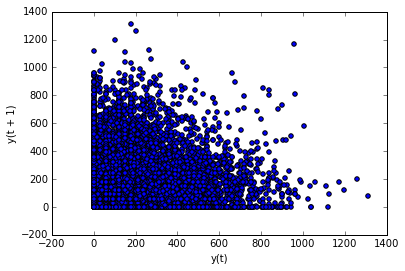

In [67]:
from pandas.tools.plotting import lag_plot
from pandas.tools.plotting import autocorrelation_plot
plt.figure()
lag_plot(tv)

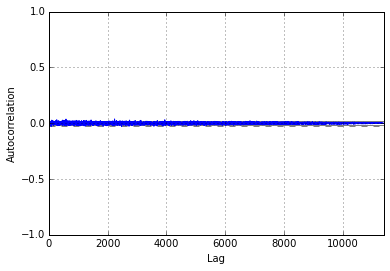

In [68]:
autocorrelation_plot(tv)